In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import xgboost as xgb
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\Dhairya Bhatt\Desktop\PowerBI\digital_marketing_campaign_dataset.csv")

In [3]:
data.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [5]:
data.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [6]:
data.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [9]:
unique_values = print(data['CampaignChannel'].unique())
unique_values = print(data['CampaignType'].unique())

['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
['Awareness' 'Retention' 'Conversion' 'Consideration']


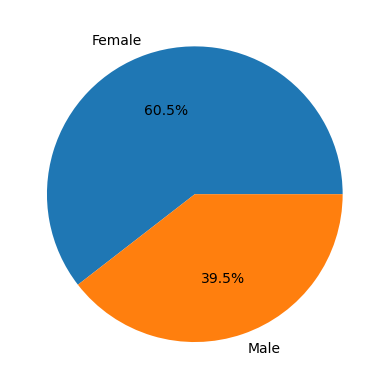

In [10]:
data.Gender.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.show()

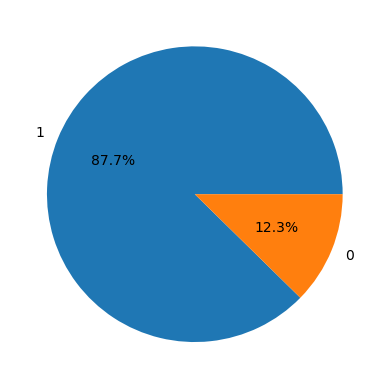

In [11]:
data.Conversion.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.show()

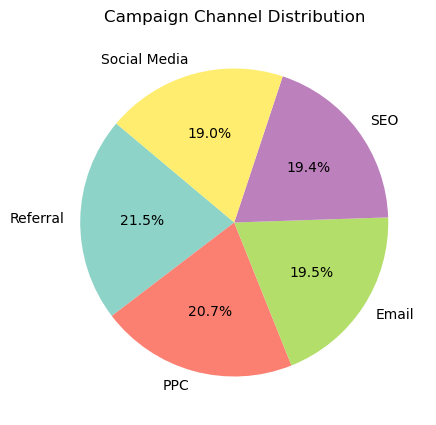

In [12]:
channel_distribution = data['CampaignChannel'].value_counts()
plt.figure(figsize=(8, 5))
channel_distribution.plot.pie(autopct='%1.1f%%', startangle=140, cmap='Set3')
plt.title('Campaign Channel Distribution')
plt.ylabel('')
plt.show()

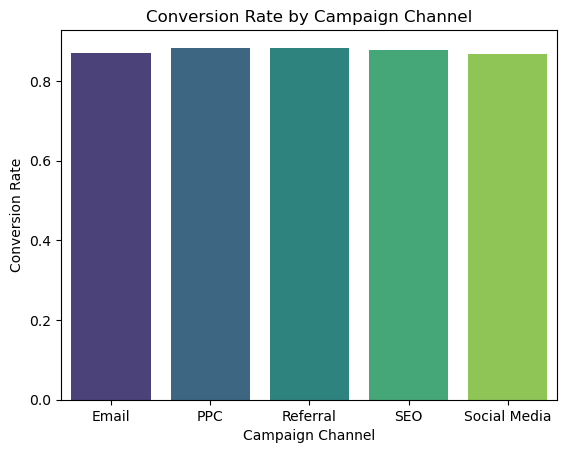

In [13]:
conversion_rate_channel = data.groupby('CampaignChannel')['Conversion'].mean().reset_index()
sns.barplot(data=conversion_rate_channel, x='CampaignChannel', y='Conversion', palette='viridis')
plt.title('Conversion Rate by Campaign Channel')
plt.ylabel('Conversion Rate')
plt.xlabel('Campaign Channel')
plt.show()

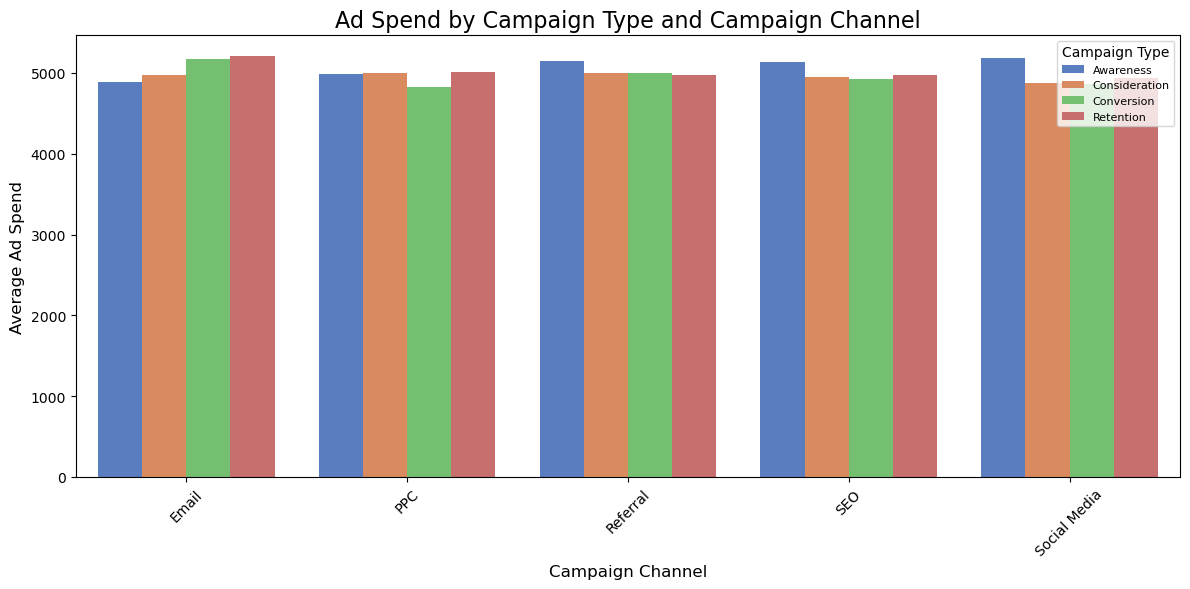

In [14]:
ad_spend_data = data.groupby(['CampaignType', 'CampaignChannel'])['AdSpend'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=ad_spend_data, 
    x='CampaignChannel', 
    y='AdSpend', 
    hue='CampaignType', 
    palette='muted'
)
plt.title('Ad Spend by Campaign Type and Campaign Channel', fontsize=16)
plt.ylabel('Average Ad Spend', fontsize=12)
plt.xlabel('Campaign Channel', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Campaign Type', fontsize=8)
plt.tight_layout()
plt.show()

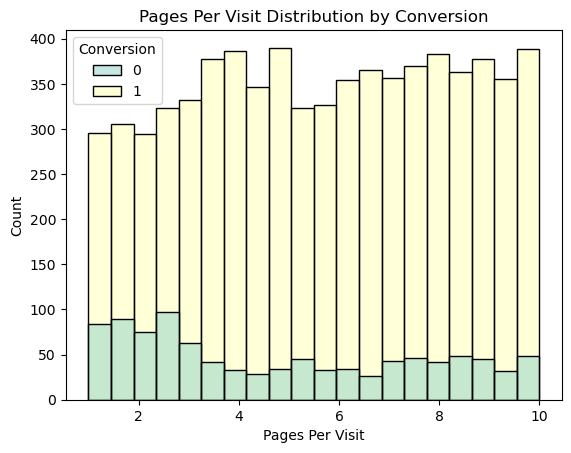

In [15]:
sns.histplot(data=data, x='PagesPerVisit', hue='Conversion', kde=False, palette='Set3', bins=20)
plt.title('Pages Per Visit Distribution by Conversion')
plt.xlabel('Pages Per Visit')
plt.ylabel('Count')
plt.show()

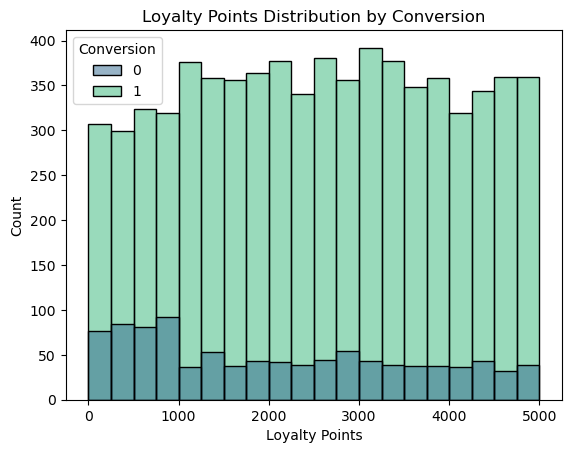

In [16]:
sns.histplot(data=data, x='LoyaltyPoints', hue='Conversion', kde=False, palette='viridis', bins=20)
plt.title('Loyalty Points Distribution by Conversion')
plt.xlabel('Loyalty Points')
plt.ylabel('Count')
plt.show()

In [17]:
data.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
5,8005,25,Female,42925,Social Media,Awareness,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,IsConfid,ToolConfid,1
6,8006,38,Female,25615,Referral,Awareness,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,IsConfid,ToolConfid,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,IsConfid,ToolConfid,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,IsConfid,ToolConfid,1
9,8009,40,Male,130764,Social Media,Awareness,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,IsConfid,ToolConfid,1


In [18]:
#Converting into numerical
label_encoder = LabelEncoder()
data['CampaignChannel'] = label_encoder.fit_transform(data['CampaignChannel'])
data['CampaignType'] = label_encoder.fit_transform(data['CampaignType'])

In [19]:
#Dropping unwanted Data
data = data.drop('AdvertisingPlatform', axis=1)
data = data.drop('AdvertisingTool', axis=1)
data = data.drop('CustomerID', axis=1)
data = data.drop('Age', axis=1)
data = data.drop('Gender', axis=1)
data = data.drop('Income', axis=1)

In [20]:
data.head(10)

,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1
5,4,0,9579.388247,0.153795,0.161316,6,2.125850,7.752831,95,5,8,0,3316,1
6,2,0,7302.899852,0.040975,0.060977,42,1.753995,10.698672,54,14,3,6,930,1
7,4,2,5324.283667,0.052878,0.188946,48,2.626015,2.987817,96,9,3,0,2983,1
8,0,3,9421.250951,0.023536,0.112585,13,5.472843,14.287421,73,4,8,5,460,1
9,4,0,6229.193333,0.066641,0.169786,22,1.135665,4.613312,14,8,4,8,3789,1


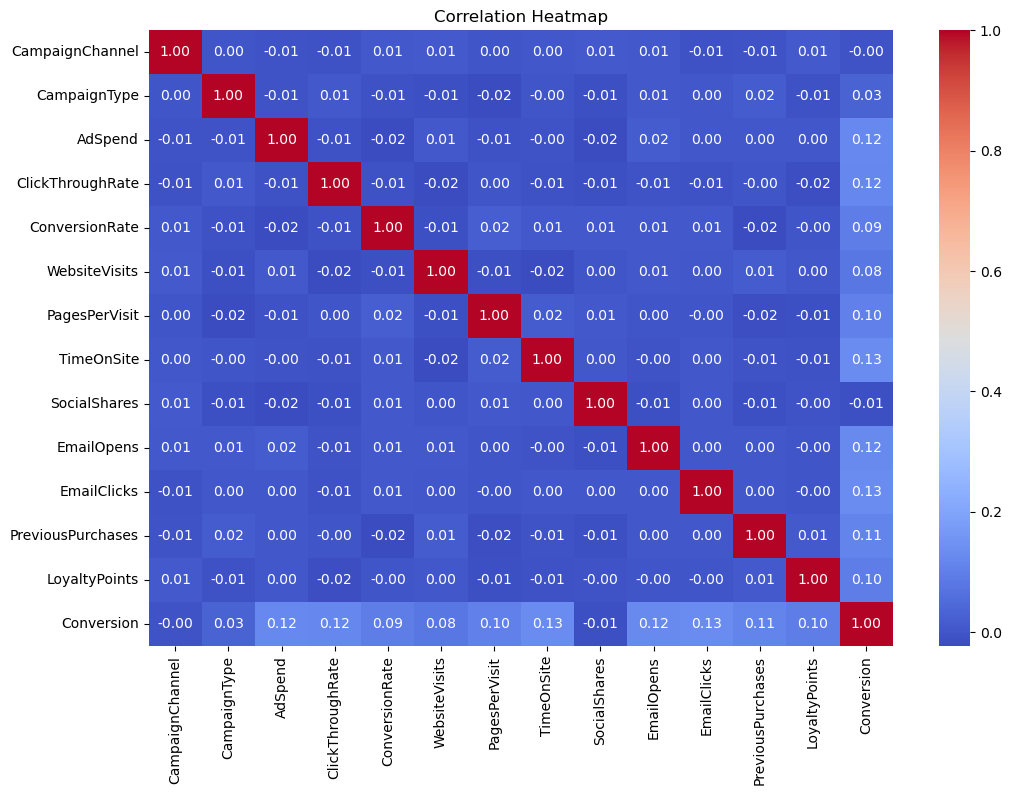

In [21]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
#Spliting into x and y 
X = data.drop(columns=['Conversion'])
y = data['Conversion']

In [23]:
#Using Over Sampling Technique 
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(X, y)

print("Original class distribution:", y.value_counts())
print("Resampled class distribution:", pd.Series(y_resampled).value_counts())

Original class distribution: Conversion
1    7012
0     988
Name: count, dtype: int64
Resampled class distribution: Conversion
1    7012
0    7012
Name: count, dtype: int64


In [24]:
scaler = StandardScaler()
numerical_cols = x_resampled.select_dtypes(include=['float64', 'int64']).columns
x_resampled[numerical_cols] = scaler.fit_transform(x_resampled[numerical_cols])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

Logistic Regression Accuracy: 0.752584670231729
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1377
           1       0.77      0.73      0.75      1428

    accuracy                           0.75      2805
   macro avg       0.75      0.75      0.75      2805
weighted avg       0.75      0.75      0.75      2805



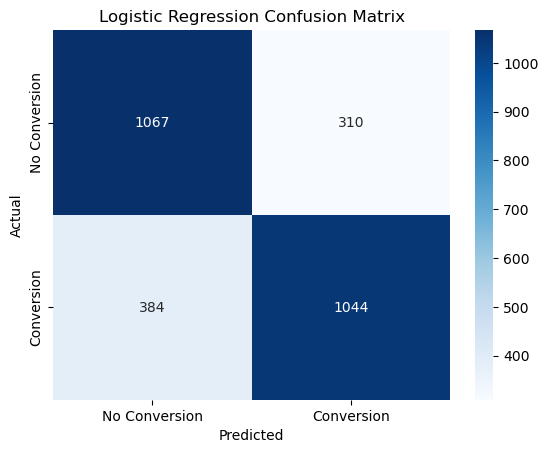

In [26]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

conf_matrix_log = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Decision Tree Accuracy: 0.7914438502673797
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1377
           1       0.83      0.74      0.78      1428

    accuracy                           0.79      2805
   macro avg       0.79      0.79      0.79      2805
weighted avg       0.80      0.79      0.79      2805



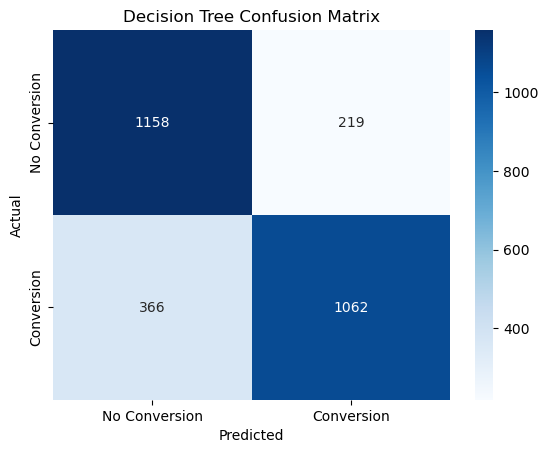

In [27]:
#Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

RandomForestClassifier: 0.8926916221033868
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1377
           1       0.92      0.87      0.89      1428

    accuracy                           0.89      2805
   macro avg       0.89      0.89      0.89      2805
weighted avg       0.89      0.89      0.89      2805



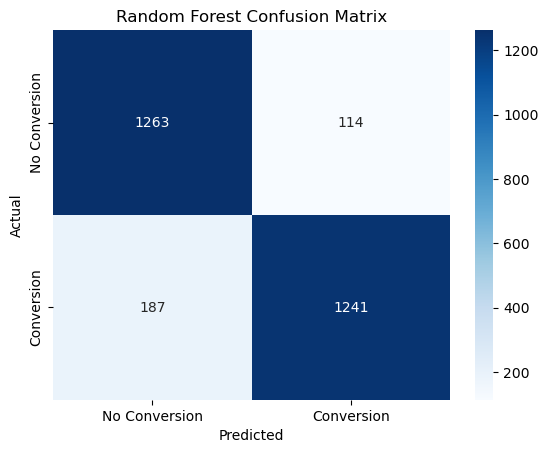

In [28]:
#Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
print("RandomForestClassifier:", accuracy_score(y_test, y_pred_rf))

print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Gradient Boost Accuracy: 0.8071301247771836
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1377
           1       0.83      0.79      0.81      1428

    accuracy                           0.81      2805
   macro avg       0.81      0.81      0.81      2805
weighted avg       0.81      0.81      0.81      2805



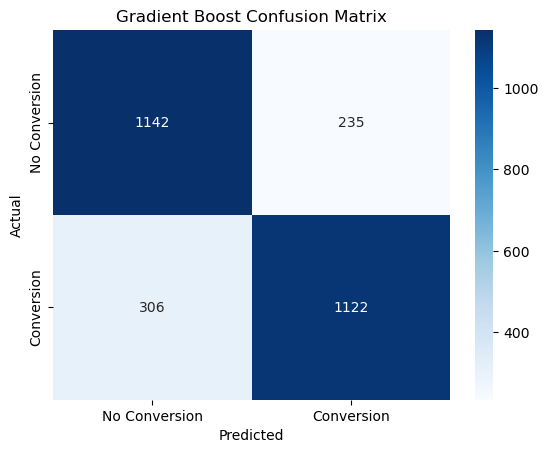

In [29]:
#Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)
print("Gradient Boost Accuracy:", accuracy_score(y_test, y_pred_gb))

print(classification_report(y_test, y_pred_gb))

conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title("Gradient Boost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost Accuracy: 0.8944741532976828
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1377
           1       0.92      0.87      0.89      1428

    accuracy                           0.89      2805
   macro avg       0.90      0.89      0.89      2805
weighted avg       0.90      0.89      0.89      2805



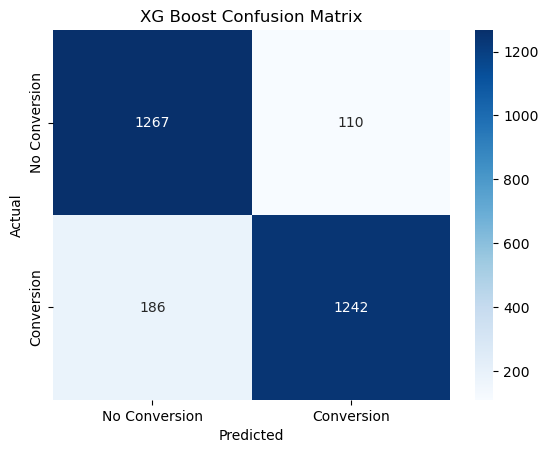

In [30]:
#XG Boost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title("XG Boost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

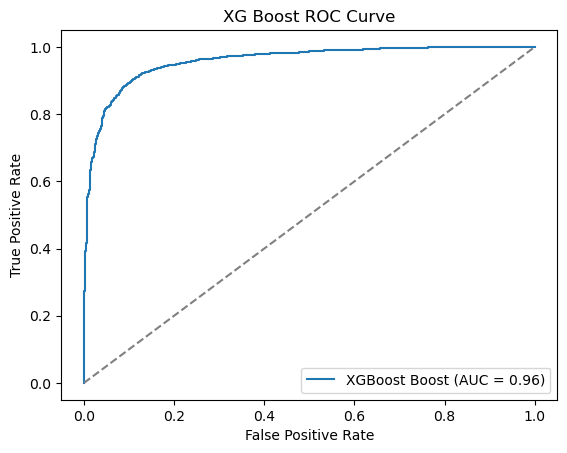

In [31]:
#ROC Curve XG Boost
y_pred_proba_xgb = xgb_model.predict_proba(x_test)[:, 1]

roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost Boost (AUC = {roc_auc_xgb:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.title("XG Boost ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

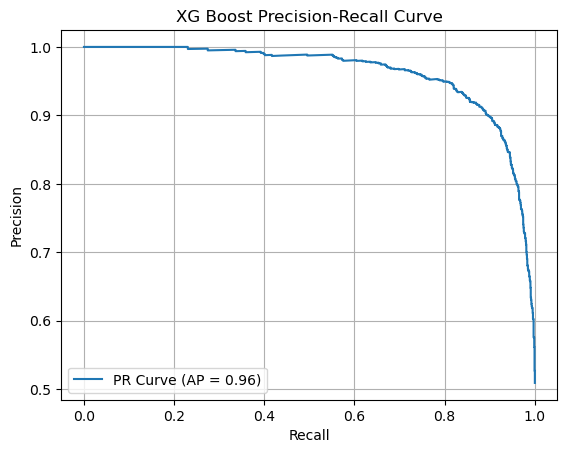

In [32]:
#Precision-Recall Curve XG Boost
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_xgb)

avg_precision = average_precision_score(y_test, y_pred_proba_xgb)

plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("XG Boost Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

SVM Accuracy: 0.7529411764705882
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1377
           1       0.76      0.75      0.75      1428

    accuracy                           0.75      2805
   macro avg       0.75      0.75      0.75      2805
weighted avg       0.75      0.75      0.75      2805



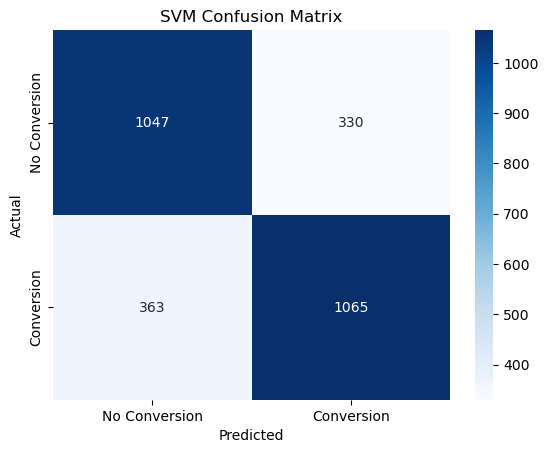

In [33]:
#SVM (Support Vector Machine)
svm = SVC(kernel='linear', random_state=42)
svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print(classification_report(y_test, y_pred_svm))

conf_matrix_bag_svm = confusion_matrix(y_test, y_pred_svm)

sns.heatmap(conf_matrix_bag_svm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

KNN Accuracy: 0.8121212121212121
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      1377
           1       0.97      0.65      0.78      1428

    accuracy                           0.81      2805
   macro avg       0.85      0.82      0.81      2805
weighted avg       0.85      0.81      0.81      2805



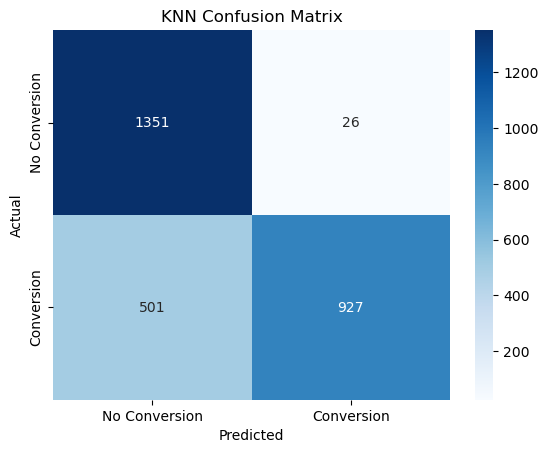

In [34]:
#KNN (K-nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn))

conf_matrix_bag_knn = confusion_matrix(y_test, y_pred_knn)

sns.heatmap(conf_matrix_bag_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['No Conversion', 'Conversion'],
            yticklabels=['No Conversion', 'Conversion'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [35]:
#Applying Hyperparameter(GridSearchCV) on XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring ='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy on Test Set: 0.910873440285205
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1377
           1       0.94      0.88      0.91      1428

    accuracy                           0.91      2805
   macro avg       0.91      0.91      0.91      2805
weighted avg       0.91      0.91      0.91      2805



In [36]:
#Applying Hyperparameter(RandomizedSearchCV) on XGBoost
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Accuracy on Test Set: 0.910873440285205
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1377
           1       0.94      0.88      0.91      1428

    accuracy                           0.91      2805
   macro avg       0.91      0.91      0.91      2805
weighted avg       0.91      0.91      0.91      2805



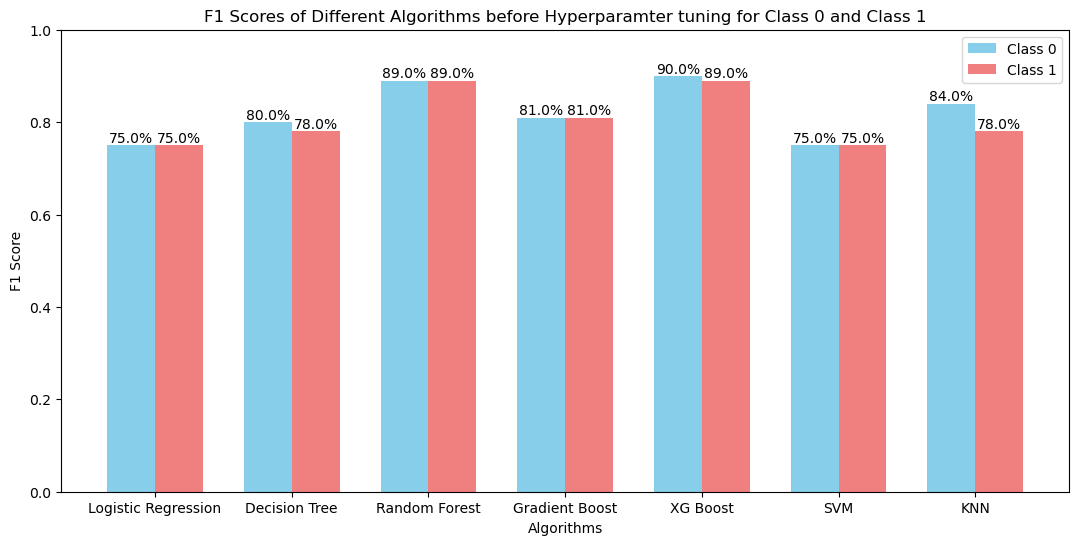

In [51]:
algorithms = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'XG Boost', 'SVM', 'KNN']
f1_scores_class_0 = [0.75, 0.80, 0.89, 0.81, 0.90, 0.75, 0.84]
f1_scores_class_1 = [0.75, 0.78, 0.89, 0.81, 0.89, 0.75, 0.78]

x = range(len(algorithms))  

fig, ax = plt.subplots(figsize=(13, 6))
bar_width = 0.35  

bars_class_0 = ax.bar(x, f1_scores_class_0, bar_width, label='Class 0', color='skyblue')
bars_class_1 = ax.bar([p + bar_width for p in x], f1_scores_class_1, bar_width, label='Class 1', color='lightcoral')

for bar in bars_class_0:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*100:.1f}%', ha='center', va='bottom')

for bar in bars_class_1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*100:.1f}%', ha='center', va='bottom')

ax.set_xlabel('Algorithms')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores of Different Algorithms before Hyperparamter tuning for Class 0 and Class 1')
ax.set_xticks([p + bar_width/2 for p in x])
ax.set_xticklabels(algorithms)
ax.legend()
plt.ylim(0, 1)  
plt.show()